In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/deepesh/Downloads/diamonds_new.csv")
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
carat        53841 non-null float64
cut          53940 non-null object
color        53884 non-null object
clarity      53940 non-null object
table        53877 non-null float64
x            53940 non-null float64
y            53940 non-null float64
z            53940 non-null float64
price_new    53940 non-null float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [4]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [5]:
data.shape

(53940, 9)

In [6]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [7]:
zero_index=data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [8]:
data1=data.drop(zero_index)
data1.shape

(53932, 9)

Text(0.5, 1.0, 'boxpplot of length')

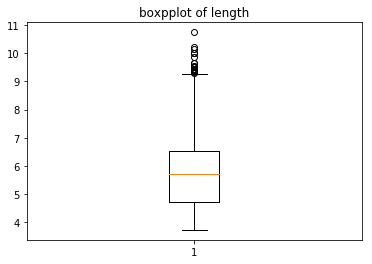

In [9]:
plt.boxplot(data1['x'])
plt.title('boxpplot of length')

Text(0.5, 1.0, 'boxpplot of breadth')

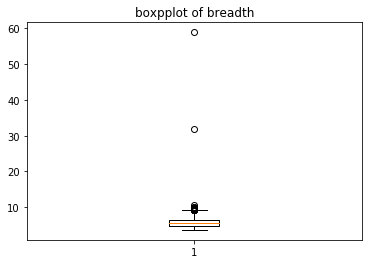

In [10]:
plt.boxplot(data1['y'])
plt.title('boxpplot of breadth')

Text(0.5, 1.0, 'boxpplot of width')

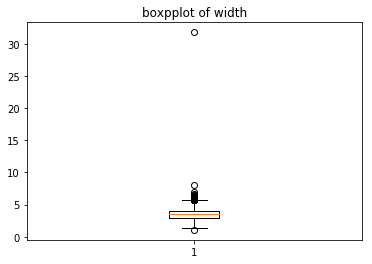

In [11]:
plt.boxplot(data1['z'])
plt.title('boxpplot of width')

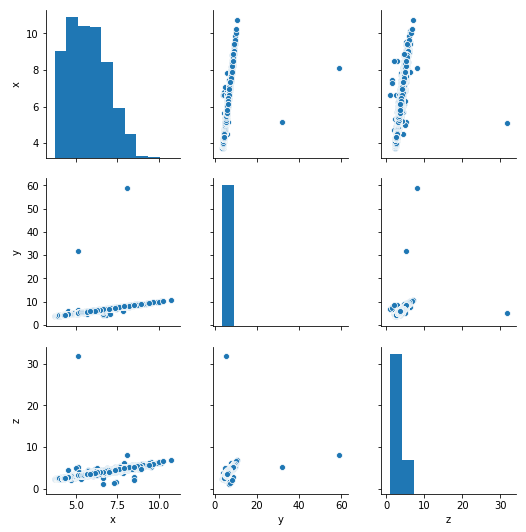

In [12]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [13]:
data1[data1['x']>30].index

Int64Index([], dtype='int64')

In [14]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [15]:
data2=data1.drop([24067,49189])

In [16]:
data2[data2['z']>=30].index

Int64Index([48410], dtype='int64')

In [17]:
data2=data2.drop([48410])

In [18]:
data2[data2['z']>=30]

,carat,cut,color,clarity,table,x,y,z,price_new


{'whiskers': [<matplotlib.lines.Line2D at 0xc70ddd8>,
 'caps': [<matplotlib.lines.Line2D at 0xc7154a8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc70d9e8>],
 'medians': [<matplotlib.lines.Line2D at 0xc715b38>],
 'fliers': [<matplotlib.lines.Line2D at 0xc715e80>],
 'means': []}

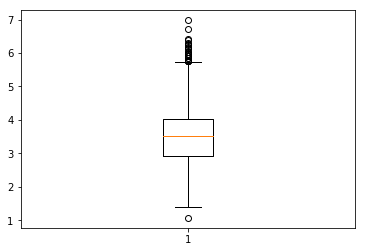

In [19]:
plt.boxplot(data2['z'])

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53929 entries, 0 to 53939
Data columns (total 9 columns):
carat        53830 non-null float64
cut          53929 non-null object
color        53873 non-null object
clarity      53929 non-null object
table        53866 non-null float64
x            53929 non-null float64
y            53929 non-null float64
z            53929 non-null float64
price_new    53929 non-null float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


# Filling missing data in carat and table columns

In [21]:
for i in ['carat','table']:
    data2[i]=data2[i].fillna(data2[i].median())

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53929 entries, 0 to 53939
Data columns (total 9 columns):
carat        53929 non-null float64
cut          53929 non-null object
color        53873 non-null object
clarity      53929 non-null object
table        53929 non-null float64
x            53929 non-null float64
y            53929 non-null float64
z            53929 non-null float64
price_new    53929 non-null float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


# Label encoding cut and clarity columns

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data2['cut']=label_encoder.fit_transform(data2['cut'])
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,SI2,58.0,4.34,4.35,2.75,167.5


In [24]:
data2['clarity']=label_encoder.fit_transform(data2['clarity'])
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,E,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5


In [25]:
x=data2.drop('price_new',axis=1)
y=data2['price_new']
x.describe()

,carat,cut,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,2.553061,3.835135,57.457134,5.731986,5.733796,3.539523
std,0.473967,1.027659,1.724708,2.234069,1.119649,1.111501,0.691693
min,0.200000,0.000000,0.000000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,7.000000,95.000000,10.740000,10.540000,6.980000


# Drop all categorical data columns(cut,color,clarity)

In [26]:
x1=x.drop(['cut','color','clarity'],axis=1)

In [27]:
x1.head()

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


In [28]:
from sklearn import preprocessing
x1=preprocessing.normalize(x1)

In [29]:
x1=pd.DataFrame(x1,columns=['carat','table','x','y','z'])

In [30]:
x1.head()

,carat,table,x,y,z
0,0.004156,0.993875,0.071378,0.071920,0.043911
1,0.003426,0.995296,0.063470,0.062655,0.037691
2,0.003523,0.995491,0.062027,0.062333,0.035378
3,0.004969,0.993737,0.071960,0.072474,0.045061
4,0.005309,0.993317,0.074328,0.074499,0.047097


In [31]:
x=x.drop(['carat','table','x','y','z'],axis=1,inplace=True)

In [32]:
x=pd.concat([x,x1],axis=1)

# Building a machine learning model

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 544660.5119240776
R squared value is: 0.8618527092152285
